## Linear Regression Assumptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [3]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [6]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

## 1. Linear Relationship

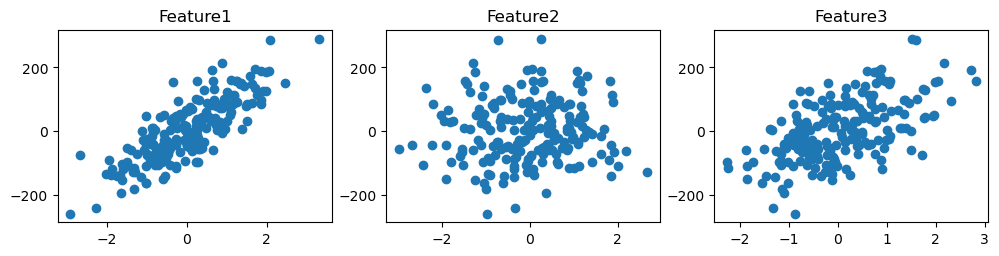

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title('Feature1')

ax2.scatter(df['feature2'], df['target'])
ax2.set_title('Feature2')

ax3.scatter(df['feature3'], df['target'])
ax3.set_title('Feature3')

plt.show()

## 2. Multicollinearity

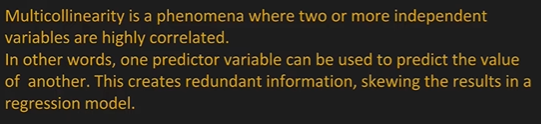

Different ways to detect multi-collinearity

- Domain Knowledge
- Scatter Plot b/w independent features
- Correlation Matrix (Heatmap)
- Variance Inflation Factor (VIF)

### Heatmap

<AxesSubplot: >

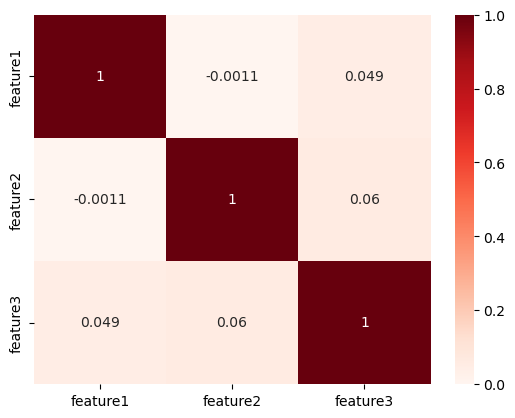

In [9]:
sns.heatmap(df.iloc[:,:3].corr(), cmap='Reds', annot=True)

### Variance Inflation Factor(VIF)

Multi-collinearity is a more difficult problem to solve wherein multiple features may be correlated to one particular feature and thus removing multicollinearity in case of linear regression, is a difficult challenge.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import warnings
from scipy import stats
from sklearn.datasets import fetch_california_housing
warnings.filterwarnings('ignore')

In [11]:
cal = fetch_california_housing()
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
X = cal['data']
y = cal['target']
names = list(cal['feature_names'])

In [13]:
inp_df = pd.DataFrame(X, columns=names)

In [14]:
inp_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
for i in range(0, len(names)):
    y = inp_df.loc[:, inp_df.columns==names[i]]
    x = inp_df.loc[:, inp_df.columns!=names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq), 2)
    print(
        f"R Square value of {names[i]} is {round(rsq, 2)} keeping all other columns as features"
    )
    
    print(
        f"Variance Inflation Factor (VIF) of {names[i]} column is {vif}\n"
    )

R Square value of MedInc is 0.91 keeping all other columns as features
Variance Inflation Factor (VIF) of MedInc column is 11.51

R Square value of HouseAge is 0.86 keeping all other columns as features
Variance Inflation Factor (VIF) of HouseAge column is 7.2

R Square value of AveRooms is 0.98 keeping all other columns as features
Variance Inflation Factor (VIF) of AveRooms column is 45.99

R Square value of AveBedrms is 0.98 keeping all other columns as features
Variance Inflation Factor (VIF) of AveBedrms column is 43.59

R Square value of Population is 0.66 keeping all other columns as features
Variance Inflation Factor (VIF) of Population column is 2.94

R Square value of AveOccup is 0.09 keeping all other columns as features
Variance Inflation Factor (VIF) of AveOccup column is 1.1

R Square value of Latitude is 1.0 keeping all other columns as features
Variance Inflation Factor (VIF) of Latitude column is 559.87

R Square value of Longitude is 1.0 keeping all other columns as f

In [16]:
# Another way to calculate VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(len(names)):
    vif.append(variance_inflation_factor(inp_df, i))


In [18]:
pd.DataFrame({'vif':vif}, index = names)

,vif
MedInc,11.511140
HouseAge,7.195917
AveRooms,45.993601
AveBedrms,43.590314
Population,2.935745
AveOccup,1.095243
Latitude,559.874071
Longitude,633.711654


In [19]:
# VIF on another dataset

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [21]:
pd.DataFrame({"vif":vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


## 3. Normality of Residuals

In [24]:
df = pd.read_csv('data.csv')
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X,y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

In [25]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

### kde plot (Normal Distribution)

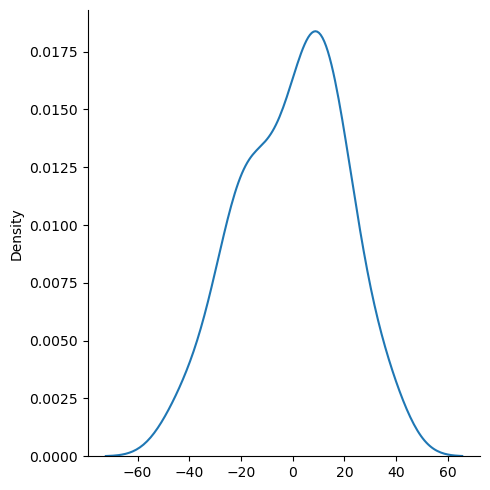

In [28]:
sns.displot(residual, kind='kde')
plt.show()

### Q-Q plot

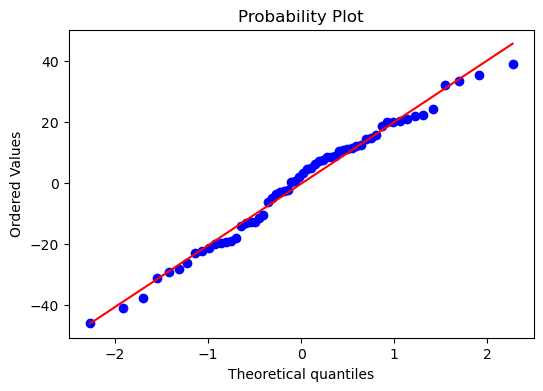

In [34]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax, fit=True)
plt.show()

## 4. Homoscedasticity 

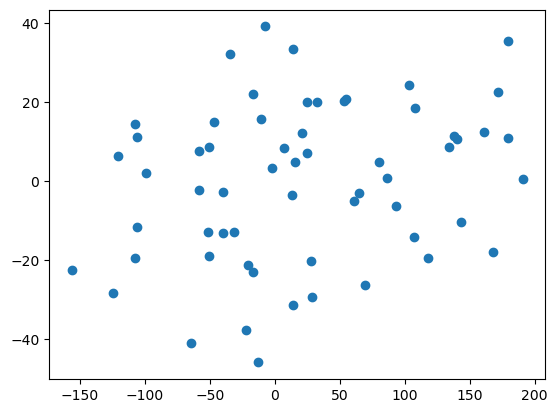

In [41]:
plt.scatter(x=y_pred, y=residual)
plt.show()

## 5. Autocorrelation of Residuals

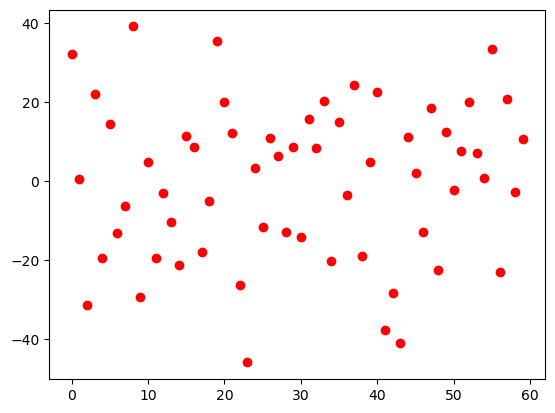

In [55]:
plt.plot(residual, 'ro')

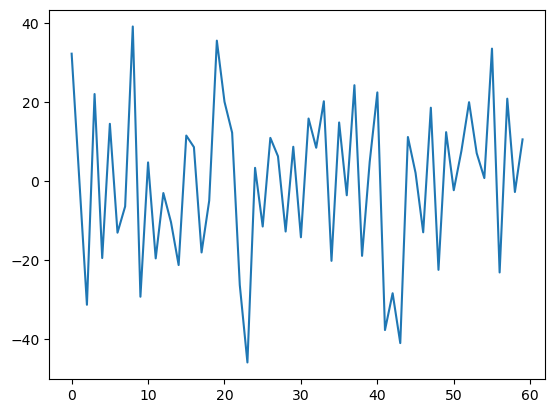

In [56]:
plt.plot(residual)

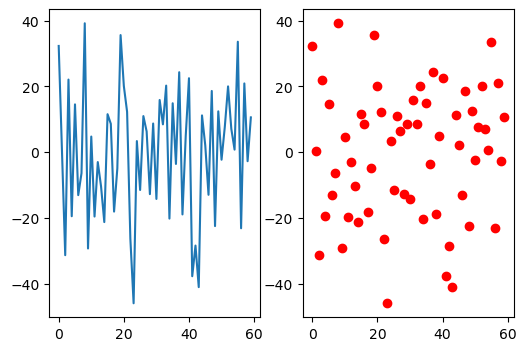

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))

ax1.plot(residual)
ax2.plot(residual, 'ro')

plt.show()